#### LIBRARY IMPORTS

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import time

#### OPEN FILE

In [2]:
df = pd.read_csv('smk_stats_v10.csv', sep = ';', encoding = 'iso-8859-1')
df.head()

,Name,Nickname,Country,MC1,DP1,GV1,BC1,MC2,CI1,GV2,...,Final Phase Tracks,Tracks Position,Points 2019,Points 2018,Points 2017,Points 2016,Points 2015,Points 2014,Points 2013,Points 2012
0,Adam Ferguson,Kepl3r,UK,"1:02,16","1:23,24","1:08,93","1:40,33","1:20,09","0:58,08","1:04,99",...,-,0,745,0,0,0,0,0,0,0
1,Aron Langerak,Masterpie9,NL,"1:01,65","1:14,00","1:08,83","1:39,91","1:19,50","1:08,79","1:04,49",...,-,0,410,0,0,0,0,0,0,0
2,Chris Clark,Zarkov,UK,"1:02,32","1:20,07","1:08,87","1:35,40","1:22,44","1:07,32","1:05,07",...,-,0,408,0,0,0,0,0,0,0
3,Christian Wild,Chraizy,GER,"1:01,41","1:13,80","1:08,09","1:30,12","1:18,94","1:02,96","1:03,50",...,-,0,1002,0,0,0,0,0,0,0
4,Christopher Barker,Yorkshire SMK,UK,"1:01,82","1:22,96","1:08,33","1:42,80","1:20,17","1:03,54","1:08,53",...,-,0,420,0,0,0,0,0,0,0


#### Data preparation/investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                583 non-null    object
 1   Nickname            583 non-null    object
 2   Country             583 non-null    object
 3   MC1                 583 non-null    object
 4   DP1                 583 non-null    object
 5   GV1                 583 non-null    object
 6   BC1                 583 non-null    object
 7   MC2                 583 non-null    object
 8   CI1                 583 non-null    object
 9   GV2                 583 non-null    object
 10  DP2                 583 non-null    object
 11  BC2                 583 non-null    object
 12  MC3                 583 non-null    object
 13  KB1                 583 non-null    object
 14  CI2                 583 non-null    object
 15  VL1                 583 non-null    object
 16  BC3                 583 no

In [4]:
# Les colonnes 2 à 24 doivent être transformées en Datetime pour pouvoir prendre en compte les chronos.
# Le traitement ci-dessous:
df['MC1'] = pd.to_datetime(df['MC1'], format='%M:%S,%f')
df['DP1'] = pd.to_datetime(df['DP1'], format='%M:%S,%f')
df['GV1'] = pd.to_datetime(df['GV1'], format='%M:%S,%f')
df['BC1'] = pd.to_datetime(df['BC1'], format='%M:%S,%f')
df['MC2'] = pd.to_datetime(df['MC2'], format='%M:%S,%f')
df['CI1'] = pd.to_datetime(df['CI1'], format='%M:%S,%f')
df['GV2'] = pd.to_datetime(df['GV2'], format='%M:%S,%f')
df['DP2'] = pd.to_datetime(df['DP2'], format='%M:%S,%f')
df['BC2'] = pd.to_datetime(df['BC2'], format='%M:%S,%f')
df['MC3'] = pd.to_datetime(df['MC3'], format='%M:%S,%f')
df['KB1'] = pd.to_datetime(df['KB1'], format='%M:%S,%f')
df['CI2'] = pd.to_datetime(df['CI2'], format='%M:%S,%f')
df['VL1'] = pd.to_datetime(df['VL1'], format='%M:%S,%f')
df['BC3'] = pd.to_datetime(df['BC3'], format='%M:%S,%f')
df['MC4'] = pd.to_datetime(df['MC4'], format='%M:%S,%f')
df['DP3'] = pd.to_datetime(df['DP3'], format='%M:%S,%f')
df['KB2'] = pd.to_datetime(df['KB2'], format='%M:%S,%f')
df['GV3'] = pd.to_datetime(df['GV3'], format='%M:%S,%f')
df['VL2'] = pd.to_datetime(df['VL2'], format='%M:%S,%f')
df['RR'] = pd.to_datetime(df['RR'], format='%M:%S,%f')
df['Total Time'] = pd.to_datetime(df['Total Time'], format='%M:%S,%f')

##### 1) Analyser la distribution des données chronométrées par course sur l’ensemble des années.

In [30]:
# La distribution des données en histogramme ne fonctionne pas avec les temps à 09:59,99, il faut clean.

In [5]:
# Clean toutes les données égales à 1900-01-01 00:09:59.990 dans les colonnes pour les différents chronos
mc1_all = df[df['MC1'] != '1900-01-01 00:09:59.990']
dp1_all = df[df['DP1'] != '1900-01-01 00:09:59.990']
gv1_all = df[df['GV1'] != '1900-01-01 00:09:59.990']
bc1_all = df[df['BC1'] != '1900-01-01 00:09:59.990']
mc2_all = df[df['MC2'] != '1900-01-01 00:09:59.990']
ci1_all = df[df['CI1'] != '1900-01-01 00:09:59.990']
gv2_all = df[df['GV2'] != '1900-01-01 00:09:59.990']
dp2_all = df[df['DP2'] != '1900-01-01 00:09:59.990']
bc2_all = df[df['BC2'] != '1900-01-01 00:09:59.990']
mc3_all = df[df['MC3'] != '1900-01-01 00:09:59.990']
kb1_all = df[df['KB1'] != '1900-01-01 00:09:59.990']
ci2_all = df[df['CI2'] != '1900-01-01 00:09:59.990']
vl1_all = df[df['VL1'] != '1900-01-01 00:09:59.990']
bc3_all = df[df['BC3'] != '1900-01-01 00:09:59.990']
mc4_all = df[df['MC4'] != '1900-01-01 00:09:59.990']
dp3_all = df[df['DP3'] != '1900-01-01 00:09:59.990']
kb2_all = df[df['KB2'] != '1900-01-01 00:09:59.990']
gv3_all = df[df['GV3'] != '1900-01-01 00:09:59.990']
vl2_all = df[df['VL2'] != '1900-01-01 00:09:59.990']
rr_all = df[df['RR'] != '1900-01-01 00:09:59.990']

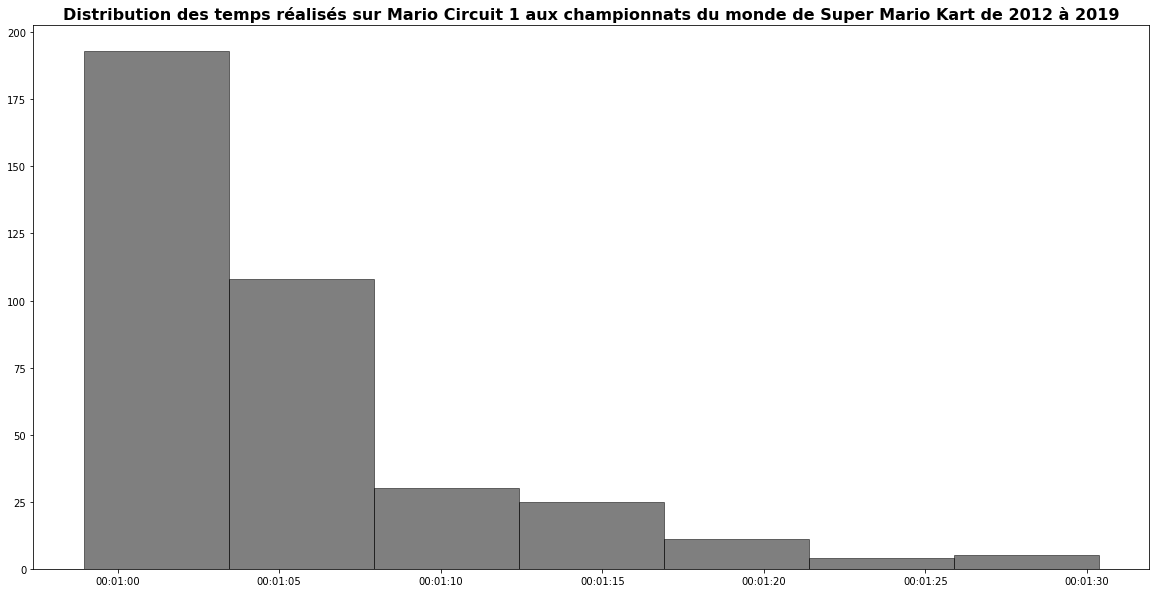

In [9]:
# Histogramme: Exemple de distribution pour MC1
plt.figure(figsize = (20,10))
plt.hist(mc1_all['MC1'], bins=7,ec='black', facecolor='black', alpha=0.5)
plt.title('Distribution des temps réalisés sur Mario Circuit 1 aux championnats du monde de Super Mario Kart de 2012 à 2019', fontweight='bold', fontsize='16')
plt.show()

In [39]:
# Trouver comment répartir les abscisses par tranche de seconde souhaitées

#### SUBPLOT: Distribution de l'ensemble des données de temps pour chaque course aux championnats du monde de Super Mario Kart entre 2012 et 2019 en Phase de poule du Time Trial.

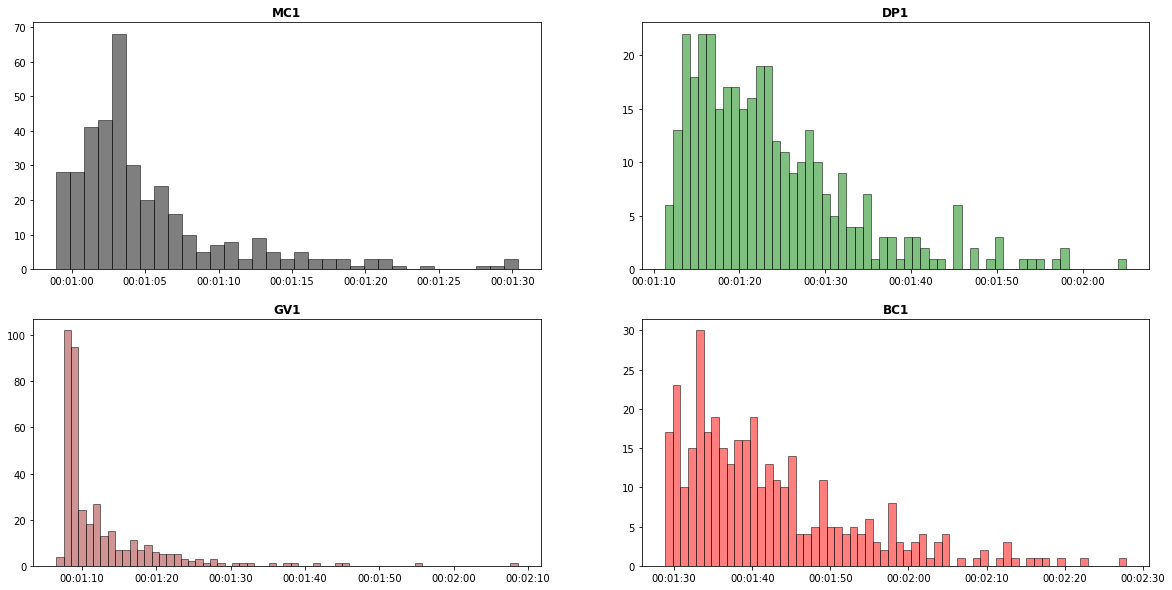

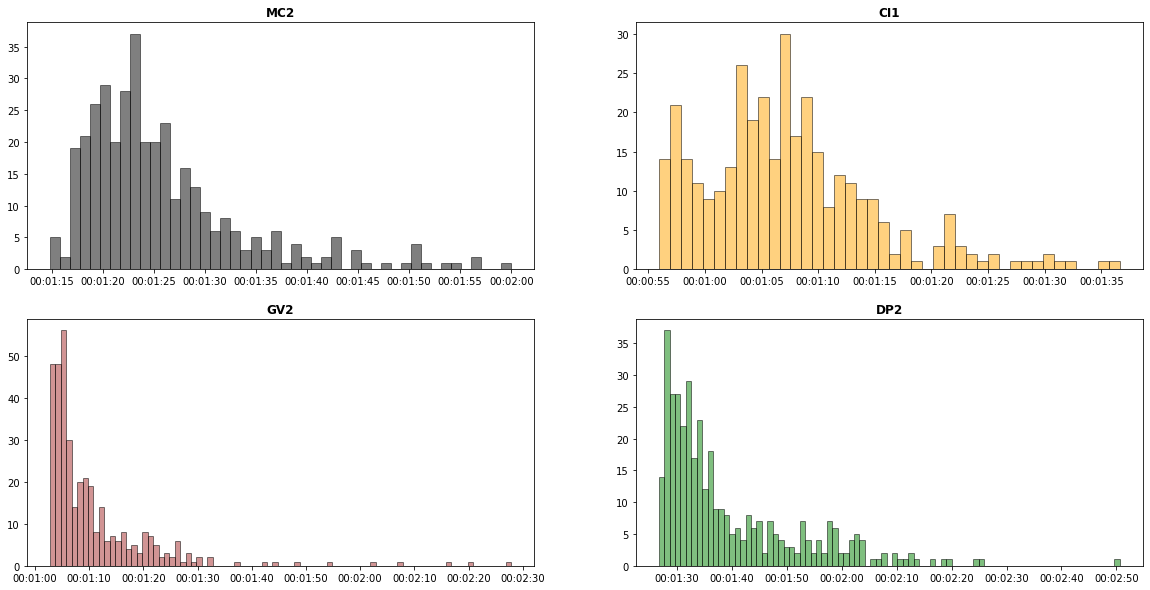

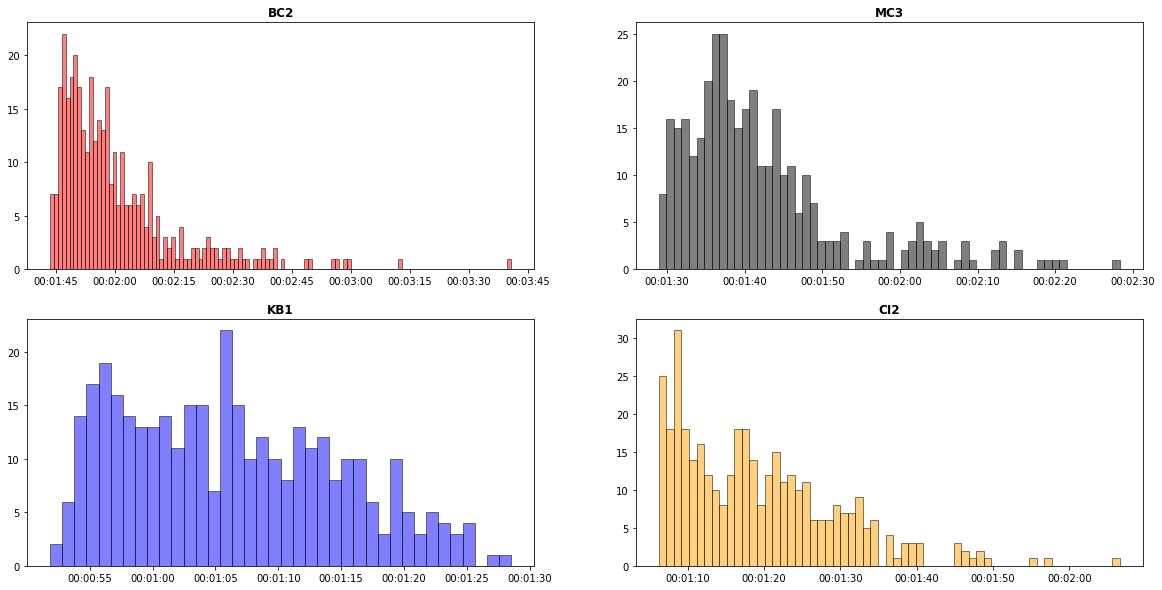

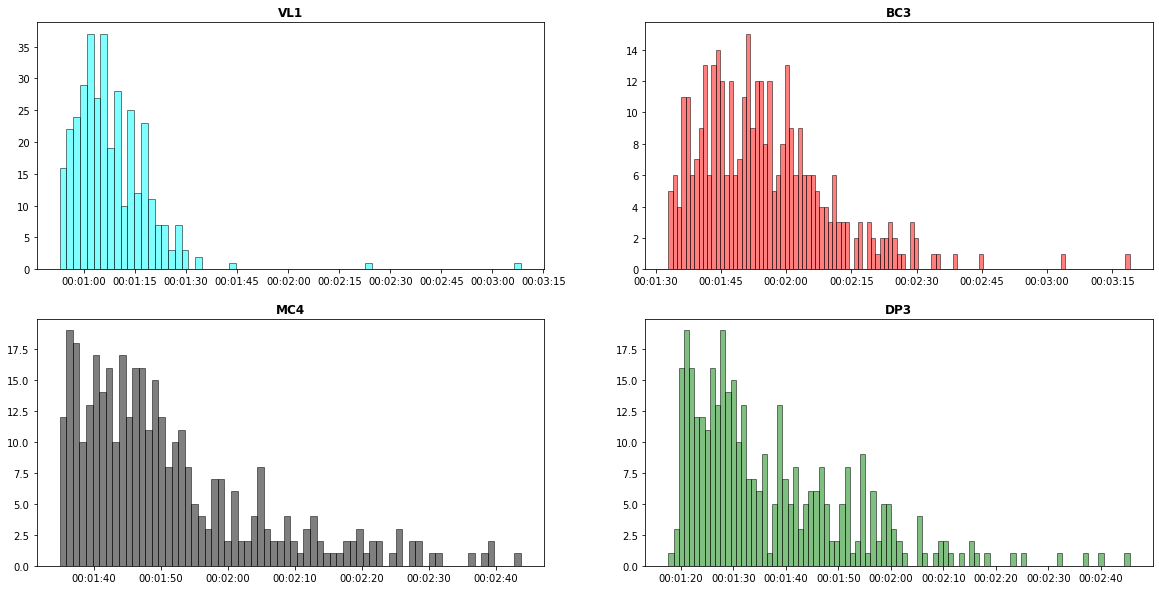

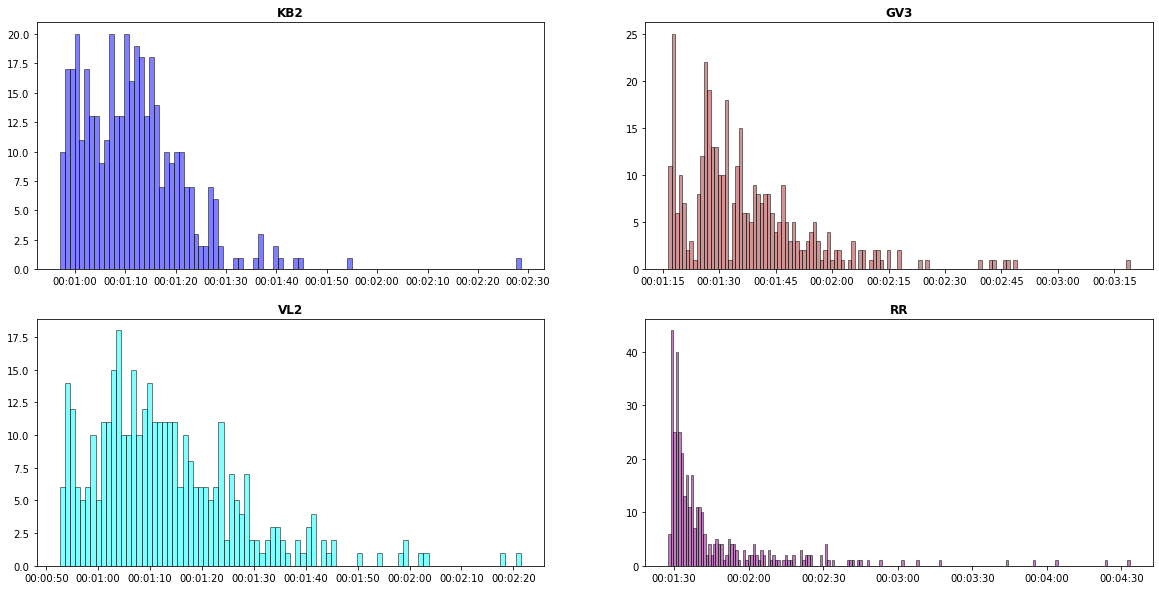

In [12]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(mc1_all['MC1'], bins=33,ec='black', facecolor='black', alpha=0.5)
plt.title('MC1', fontweight='bold')

plt.subplot(2,2,2)
plt.hist(dp1_all['DP1'], bins=56,ec='black', facecolor='green', alpha=0.5)
plt.title('DP1', fontweight='bold')

plt.subplot(2,2,3)
plt.hist(gv1_all['GV1'], bins=63,ec='black', facecolor='brown', alpha=0.5)
plt.title('GV1', fontweight='bold')

plt.subplot(2,2,4)
plt.hist(bc1_all['BC1'], bins=60,ec='black', facecolor='red', alpha=0.5)
plt.title('BC1', fontweight='bold')#UN TRUC LEGEREMENT BIZARRE (OUTLIER), à voir 

plt.show()

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(mc2_all['MC2'], bins=46,ec='black', facecolor='black', alpha=0.5)
plt.title('MC2', fontweight='bold')

plt.subplot(2,2,2)
plt.hist(ci1_all['CI1'], bins=42,ec='black', facecolor='orange', alpha=0.5)
plt.title('CI1', fontweight='bold')

plt.subplot(2,2,3)
plt.hist(gv2_all['GV2'], bins=85,ec='black', facecolor='brown', alpha=0.5)
plt.title('GV2', fontweight='bold')

plt.subplot(2,2,4)
plt.hist(dp2_all['DP2'], bins=85,ec='black', facecolor='green', alpha=0.5)
plt.title('DP2', fontweight='bold')

plt.show()

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(bc2_all['BC2'], bins=118,ec='black', facecolor='red', alpha=0.5)
plt.title('BC2', fontweight='bold')

plt.subplot(2,2,2)
plt.hist(mc3_all['MC3'], bins=61,ec='black', facecolor='black', alpha=0.5)
plt.title('MC3', fontweight='bold')

plt.subplot(2,2,3)
plt.hist(kb1_all['KB1'], bins=38,ec='black', facecolor='blue', alpha=0.5)
plt.title('KB1', fontweight='bold')

plt.subplot(2,2,4)
plt.hist(ci2_all['CI2'], bins=61,ec='black', facecolor='orange', alpha=0.5)
plt.title('CI2', fontweight='bold')

plt.show()

plt.show()

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vl1_all['VL1'], bins=68,ec='black', facecolor='cyan', alpha=0.5)# 137 bins réels
plt.title('VL1', fontweight='bold')

plt.subplot(2,2,2)
plt.hist(bc3_all['BC3'], bins=107,ec='black', facecolor='red', alpha=0.5)
plt.title('BC3', fontweight='bold')#BIZARRE L'AFFICHAGE MERDE, DOIT Y AVOIR UN PROBLEME DANS LES DONNEES

plt.subplot(2,2,3)
plt.hist(mc4_all['MC4'], bins=70,ec='black', facecolor='black', alpha=0.5)
plt.title('MC4', fontweight='bold')

plt.subplot(2,2,4)
plt.hist(dp3_all['DP3'], bins=89,ec='black', facecolor='green', alpha=0.5)
plt.title('DP3', fontweight='bold')

plt.show()

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(kb2_all['KB2'], bins=93,ec='black', facecolor='blue', alpha=0.5)
plt.title('KB2', fontweight='bold')

plt.subplot(2,2,2)
plt.hist(gv3_all['GV3'], bins=131,ec='black', facecolor='brown', alpha=0.5)
plt.title('GV3', fontweight='bold')

plt.subplot(2,2,3)
plt.hist(vl2_all['VL2'], bins=90,ec='black', facecolor='cyan', alpha=0.5)
plt.title('VL2', fontweight='bold')

plt.subplot(2,2,4)
plt.hist(rr_all['RR'], bins=186,ec='black', facecolor='purple', alpha=0.5)
plt.title('RR', fontweight='bold')

plt.show()

#### Commentaires:
- Les meilleurs temps sont représentés à gauche des graphiques, les moins bons à droite.
- Une même couleur est attribuée à chaque course avec un revêtement similaire.
- On constate des outliers, notamment à droite des graphiques, qui correspondent la plupart du temps à des amateurs venus s'inscrire aux championnats du monde (et quelques fois à des grosses contreperformances de joueurs plus confirmés).
- RR (Rainbow Road) est la course avec les plus gros outliers (avec des temps pointés à plus de 4 minutes).
- Un chrono situé à plus de 10 secondes du meilleur chrono peut légitimement être considéré comme un chrono insuffisant pour espérer se qualifier en phase finale(top 16) ou même espérer aller plus loin.

In [9]:
# POUR BC3, POUR FAIRE MARCHER LE PLOT IL FAUDRAIT FAIRE UN & ou | POUR VIRER LA VALEUR 9:36,00 d'Anna Moon ligne 478 fichier Excel
# Résolu en modifiant la valeur 9:36,00 par 9:59,99

In [13]:
# Calculer le nombre de bin(barres) nécessaires pour chaque plot avec le min et max de chaque course.
mc1_min = mc1_all['MC1'].min()
mc1_max = mc1_all['MC1'].max()
dp1_min = dp1_all['DP1'].min()
dp1_max = dp1_all['DP1'].max()
gv1_min = gv1_all['GV1'].min()
gv1_max = gv1_all['GV1'].max()
bc1_min = bc1_all['BC1'].min()
bc1_max = bc1_all['BC1'].max()
mc2_min = mc2_all['MC2'].min()
mc2_max = mc2_all['MC2'].max()
ci1_min = ci1_all['CI1'].min()
ci1_max = ci1_all['CI1'].max()
gv2_min = gv2_all['GV2'].min()
gv2_max = gv2_all['GV2'].max()
dp2_min = dp2_all['DP2'].min()
dp2_max = dp2_all['DP2'].max()
bc2_min = bc2_all['BC2'].min()
bc2_max = bc2_all['BC2'].max()
mc3_min = mc3_all['MC3'].min()
mc3_max = mc3_all['MC3'].max()
kb1_min = kb1_all['KB1'].min()
kb1_max = kb1_all['KB1'].max()
ci2_min = ci2_all['CI2'].min()
ci2_max = ci2_all['CI2'].max()
vl1_min = vl1_all['VL1'].min()
vl1_max = vl1_all['VL1'].max()
bc3_min = bc3_all['BC3'].min()
bc3_max = bc3_all['BC3'].max()
mc4_min = mc4_all['MC4'].min()
mc4_max = mc4_all['MC4'].max()
dp3_min = dp3_all['DP3'].min()
dp3_max = dp3_all['DP3'].max()
kb2_min = kb2_all['KB2'].min()
kb2_max = kb2_all['KB2'].max()
gv3_min = gv3_all['GV3'].min()
gv3_max = gv3_all['GV3'].max()
vl2_min = vl2_all['VL2'].min()
vl2_max = vl2_all['VL2'].max()
rr_min = rr_all['RR'].min()
rr_max = rr_all['RR'].max()

In [14]:
# F-Strings
print(f'Best One-Try ever done at Mario Circuit 1 in SMK one-try World Championships: "{mc1_min}".')
print(f'Worst One-Try ever done at Mario Circuit 1 in SMK one-try World Championships: "{mc1_max}".')
print(f'Best One-Try ever done at Donut Plains 1 in SMK one-try World Championships: "{dp1_min}".')
print(f'Worst One-Try ever done at Donut Plains 1 in SMK one-try World Championships: "{dp1_max}".')
print(f'Best One-Try ever done at Ghost Valley 1 in SMK one-try World Championships: "{gv1_min}".')
print(f'Worst One-Try ever done at Ghost Valley 1 in SMK one-try World Championships: "{gv1_max}".')
print(f'Best One-Try ever done at Bowser Castle 1 in SMK one-try World Championships: "{bc1_min}".')
print(f'Worst One-Try ever done at Bowser Castle 1 in SMK one-try World Championships: "{bc1_max}".')
print(f'Best One-Try ever done at Mario Circuit 2 in SMK one-try World Championships: "{mc2_min}".')
print(f'Worst One-Try ever done at Mario Circuit 2 in SMK one-try World Championships: "{mc2_max}".')
print(f'Best One-Try ever done at Choco Island 1 in SMK one-try World Championships: "{ci1_min}".')
print(f'Worst One-Try ever done at Choco Island 1 in SMK one-try World Championships: "{ci1_max}".')
print(f'Best One-Try ever done at Ghost Valley 2 in SMK one-try World Championships: "{gv2_min}".')
print(f'Worst One-Try ever done at Ghost Valley 2 in SMK one-try World Championships: "{gv2_max}".')
print(f'Best One-Try ever done at Donut plains 2 in SMK one-try World Championships: "{dp2_min}".')
print(f'Worst One-Try ever done at Donut plains 2 in SMK one-try World Championships: "{dp2_max}".')
print(f'Best One-Try ever done at Bowser Castle 2 in SMK one-try World Championships: "{bc2_min}".')
print(f'Worst One-Try ever done at Bowser Castle 2 in SMK one-try World Championships: "{bc2_max}".')
print(f'Best One-Try ever done at Mario Circuit 3 in SMK one-try World Championships: "{mc3_min}".')
print(f'Worst One-Try ever done at Mario Circuit 3 in SMK one-try World Championships: "{mc3_max}".')
print(f'Best One-Try ever done at Koopa Beach 1 in SMK one-try World Championships: "{kb1_min}".')
print(f'Worst One-Try ever done at Koopa Beach 1  in SMK one-try World Championships: "{kb1_max}".')
print(f'Best One-Try ever done at Choco Island 2 in SMK one-try World Championships: "{ci2_min}".')
print(f'Worst One-Try ever done at Choco Island 2 in SMK one-try World Championships: "{ci2_max}".')
print(f'Best One-Try ever done at Vanilla Lake 1 in SMK one-try World Championships: "{vl1_min}".')
print(f'Worst One-Try ever done at Vanilla Lake 1 in SMK one-try World Championships: "{vl1_max}".')
print(f'Best One-Try ever done at Bowser Castle 3 in SMK one-try World Championships: "{bc3_min}".')
print(f'Worst One-Try ever done at Bowser Castle 3 in SMK one-try World Championships: "{bc3_max}".')
print(f'Best One-Try ever done at Mario Circuit 4 in SMK one-try World Championships: "{mc4_min}".')
print(f'Worst One-Try ever done at Mario Circuit 4 in SMK one-try World Championships: "{mc4_max}".')
print(f'Best One-Try ever done at Donut plains 3 in SMK one-try World Championships: "{dp3_min}".')
print(f'Worst One-Try ever done at Donut plains 3  in SMK one-try World Championships: "{dp3_max}".')
print(f'Best One-Try ever done at Koopa Beach 2 in SMK one-try World Championships: "{kb2_min}".')
print(f'Worst One-Try ever done at Koopa Beach 2  in SMK one-try World Championships: "{kb2_max}".')
print(f'Best One-Try ever done at Ghost Valley 3 in SMK one-try World Championships: "{gv3_min}".')
print(f'Worst One-Try ever done at Ghost Valley 3 in SMK one-try World Championships: "{gv3_max}".')
print(f'Best One-Try ever done at Vanilla Lake 2 in SMK one-try World Championships: "{vl2_min}".')
print(f'Worst One-Try ever done at Vanilla Lake 2 in SMK one-try World Championships: "{vl2_max}".')
print(f'Best One-Try ever done at Rainbow Road in SMK one-try World Championships: "{rr_min}".')
print(f'Worst One-Try ever done at Rainbow Road in SMK one-try World Championships: "{rr_max}".')

Best One-Try ever done at Mario Circuit 1 in SMK one-try World Championships: "1900-01-01 00:00:58.960000".
Worst One-Try ever done at Mario Circuit 1 in SMK one-try World Championships: "1900-01-01 00:01:30.360000".
Best One-Try ever done at Donut Plains 1 in SMK one-try World Championships: "1900-01-01 00:01:11.340000".
Worst One-Try ever done at Donut Plains 1 in SMK one-try World Championships: "1900-01-01 00:02:05.050000".
Best One-Try ever done at Ghost Valley 1 in SMK one-try World Championships: "1900-01-01 00:01:06.540000".
Worst One-Try ever done at Ghost Valley 1 in SMK one-try World Championships: "1900-01-01 00:02:08.610000".
Best One-Try ever done at Bowser Castle 1 in SMK one-try World Championships: "1900-01-01 00:01:28.830000".
Worst One-Try ever done at Bowser Castle 1 in SMK one-try World Championships: "1900-01-01 00:02:27.890000".
Best One-Try ever done at Mario Circuit 2 in SMK one-try World Championships: "1900-01-01 00:01:14.800000".
Worst One-Try ever done at M

In [11]:
# Valeur Dorian Chandelier DP2 était erronée, now ok
verif_dp2 = df[df['DP2'] == '1900-01-01 00:01:25.530000']
verif_dp2

In [13]:
verif_dp2

,Name,Nickname,Country,MC1,DP1,GV1,BC1,MC2,CI1,GV2,...,KB2,GV3,VL2,RR,Total Time,Year,Phase,2019 -Last Elim Out,Final Phase Track 1,Final Phase Track 2
412,Dorian Chandelier,Chandelier,FR,1900-01-01 00:01:29.720,1900-01-01 00:01:56.530,1900-01-01 00:01:32.230,1900-01-01 00:02:19.060,1900-01-01 00:01:49.580,1900-01-01 00:01:22,1900-01-01 00:02:20.730,...,1900-01-01 00:01:36.450,1900-01-01 00:02:11.450,1900-01-01 00:01:43.100,1900-01-01 00:02:25.320,1900-01-01 00:39:08.220,2014,Group Stage,999,Group Stage,Group Stage
